In [217]:
#Imports necessários para o programa que a gente precisa
import os
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import re as re
from math import fabs

In [218]:
#Uma função para auxliar a gente a coletar todos os pings de uma chamada
def tempos(tempo):
    matcher = re.compile(r"tempo=..")#achar as ocorrências de tempo
    t=str(tempo)
    time=[]
    a=0
    while matcher.search(t) != None:
        x = re.sub(r"tempo=", "",matcher.search(t).group() )
        time.append(x)
        t = t.replace (matcher.search(t).group(), "",1)
    for a in range (len(time)):
        time[a]=int(time[a])
    return time

In [219]:
#Essa função determina se o pacote em questão é IPv4 ou não
def IPv4 (pacote):
    matcher = re.compile(r"Resposta de ([0-9]+)\.")
    p= str(pacote)
    if matcher.search(p) != None:
        return True
    else:
        return False

In [220]:
#Uma função para deixar os arrays do mesmo tamanho para plotar
def tamanho(list1, list2):
    while len(list1)!=len(list2):
        if len(list1)> len(list2):
            list1.pop(0)
        else:
            list2.pop(0)
    return 0

In [221]:
#Valores de interesse
alpha=1/8
beta=1/4
SampleRTT=[0]
EstimatedRTT=[0]
DevRTT=[0]
TimeoutInterval=[0]
i=0

In [265]:
#Essa função é responsável por pingar com o ping padrão
def pingar (host, n):
    i=0
    comunica=[]
    while i<=n:
        ping = subprocess.Popen(
            ["ping", host],
            stdout = subprocess.PIPE,
            stderr = subprocess.PIPE
        )
        print(i,"/",n, "completed", end='\r')
        comunica.append(ping.communicate())
        i+=1

    return comunica

In [264]:
#Essa função é responsável por pingar com IPv4
def pingar4 (host, n):
    i=0
    comunica=[]
    while i<=n:
        ping = subprocess.Popen(
            ["ping ", "-4", host],
            stdout = subprocess.PIPE,
            stderr = subprocess.PIPE
        )
        print(i,"/",n, "completed", end='\r')
        comunica.append(ping.communicate())
        i+=1

    return comunica

In [263]:
#Essa função é responsável por pingar com IPv6
def pingar6 (host, n):
    i=0
    comunica=[]
    while i<=n:
        ping = subprocess.Popen(
            ["ping", "-6", host],
            stdout = subprocess.PIPE,
            stderr = subprocess.PIPE
        )
        comunica.append(ping.communicate())
        i+=1
        print(i,"/",n, "completed", end='\r')
    return comunica

In [225]:
pings= pingar ("www.harvard.edu",500)

In [251]:
SampleRTT=tempos(pings)
EstimatedRTT[0]=SampleRTT[0]

In [252]:
while i < len(SampleRTT):
    EstimatedRTT.append((1-alpha)*EstimatedRTT[i-1]+alpha*SampleRTT[i]) 
    DevRTT.append((1-beta)*DevRTT[i-1]+beta*fabs(SampleRTT[i]-EstimatedRTT[i]))
    TimeoutInterval.append(EstimatedRTT[i]+4*DevRTT[i])
    i+=1
tamanho(SampleRTT, EstimatedRTT)
tamanho(SampleRTT, DevRTT)
tamanho(SampleRTT, TimeoutInterval)

0

In [253]:
x1=np.array(SampleRTT)
x2=np.array(DevRTT)
x3=np.array(EstimatedRTT)
x4=np.array(TimeoutInterval)
y=np.linspace(0, sum (SampleRTT)/100, len(SampleRTT))

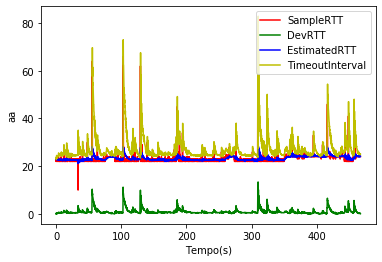

In [254]:
plt.plot(y, x1, 'r', label='SampleRTT')
plt.plot(y, x2, 'g', label='DevRTT')
plt.plot(y, x3, 'b', label='EstimatedRTT')
plt.plot(y, x4, 'y', label='TimeoutInterval')
plt.xlabel('Tempo(s)')
plt.ylabel('aa')
plt.legend()

plt.show()

In [230]:
SampleRTT_mean= np.mean(SampleRTT)
SampleRTT_std= np.std(SampleRTT)
print("SampleRTT:\nMédia=", SampleRTT_mean, "\nDesvio Padrão=", SampleRTT_std, "\n\n")
EstimatedRTT_mean= np.mean(EstimatedRTT)
EstimatedRTT_std= np.std(EstimatedRTT)
print("EstimatedRTT:\nMédia=", EstimatedRTT_mean, "\nDesvio Padrão=", EstimatedRTT_std, "\n\n")
DevRTT_mean= np.mean(DevRTT)
DevRTT_std= np.std(DevRTT)
print("DevRTT:\nMédia=", DevRTT_mean, "\nDesvio Padrão=", DevRTT_std, "\n\n")
TimeoutInterval_mean= np.mean(TimeoutInterval)
TimeoutInterval_std= np.std(TimeoutInterval)
print("TimeoutInterval:\nMédia=", TimeoutInterval_mean, "\nDesvio Padrão=", TimeoutInterval_std, "\n\n")

SampleRTT:
Média= 23.307039440838743 
Desvio Padrão= 2.7554847717690096 


EstimatedRTT:
Média= 23.299419260612417 
Desvio Padrão= 0.9288454751963272 


DevRTT:
Média= 0.9523517649408918 
Desvio Padrão= 1.1438062244584706 


TimeoutInterval:
Média= 27.108021083757432 
Desvio Padrão= 5.174654809870624 




In [231]:
if (IPv4(pings)):
    print("Foi utilizado IPv4 nesses pacotes")
else:
    print("Foi utilizado IPv6 nesses pacotes")
    

Foi utilizado IPv6 nesses pacotes


In [266]:
pings_new= pingar4 ("www.harvard.edu",500)

In [267]:
if (IPv4(pings_new)):
    print("Foi utilizado IPv4 nesses pacotes")
else:
    print("Foi utilizado IPv6 nesses pacotes")

Foi utilizado IPv4 nesses pacotes


In [268]:
SampleRTT4=[0]
EstimatedRTT4=[0]
DevRTT4=[0]
TimeoutInterval4=[0]

In [269]:
SampleRTT4=tempos(pings_new)
EstimatedRTT4[0]=SampleRTT4[0]

In [270]:
j=0
while j < len(SampleRTT4):
    EstimatedRTT4.append((1-alpha)*EstimatedRTT4[j-1]+alpha*SampleRTT4[j]) 
    DevRTT4.append((1-beta)*DevRTT4[j-1]+beta*fabs(SampleRTT4[j]-EstimatedRTT4[j]))
    TimeoutInterval4.append(EstimatedRTT4[j]+4*DevRTT4[j])
    j+=1
tamanho(SampleRTT4, EstimatedRTT4)
tamanho(SampleRTT4, DevRTT4)
tamanho(SampleRTT4, TimeoutInterval4)

0

In [271]:
x41=np.array(SampleRTT4)
x42=np.array(DevRTT4)
x43=np.array(EstimatedRTT4)
x44=np.array(TimeoutInterval4)
y4=np.linspace(0, sum (SampleRTT4)/100, len(SampleRTT4))

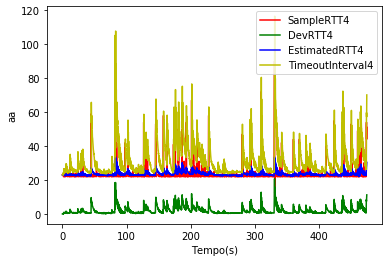

In [272]:
plt.plot(y4, x41, 'r', label='SampleRTT4')
plt.plot(y4, x42, 'g', label='DevRTT4')
plt.plot(y4, x43, 'b', label='EstimatedRTT4')
plt.plot(y4, x44, 'y', label='TimeoutInterval4')
plt.xlabel('Tempo(s)')
plt.ylabel('aa')
plt.legend()

plt.show()

In [273]:
SampleRTT4_mean= np.mean(SampleRTT4)
SampleRTT4_std= np.std(SampleRTT4)
print("SampleRTT4:\nMédia=", SampleRTT4_mean, "\nDesvio Padrão=", SampleRTT4_std, "\n\n")
EstimatedRTT4_mean= np.mean(EstimatedRTT4)
EstimatedRTT4_std= np.std(EstimatedRTT4)
print("EstimatedRTT4:\nMédia=", EstimatedRTT4_mean, "\nDesvio Padrão=", EstimatedRTT4_std, "\n\n")
DevRTT4_mean= np.mean(DevRTT4)
DevRTT4_std= np.std(DevRTT4)
print("DevRTT:\nMédia=", DevRTT4_mean, "\nDesvio Padrão=", DevRTT4_std, "\n\n")
TimeoutInterval4_mean= np.mean(TimeoutInterval4)
TimeoutInterval4_std= np.std(TimeoutInterval4)
print("TimeoutInterval4:\nMédia=", TimeoutInterval4_mean, "\nDesvio Padrão4=", TimeoutInterval4_std, "\n\n")

SampleRTT4:
Média= 23.711144427786106 
Desvio Padrão= 5.034366724372833 


EstimatedRTT4:
Média= 23.666393685298683 
Desvio Padrão= 1.3738279509965057 


DevRTT:
Média= 1.9594617482934829 
Desvio Padrão= 2.1338616272334705 


TimeoutInterval4:
Média= 31.4781220950187 
Desvio Padrão4= 9.670559052140144 


